In [3]:
from deepface import DeepFace
from deepface.commons import functions
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace
import matplotlib.pyplot as plt
import numpy as np

In [8]:
model = VGGFace.loadModel()
#model = Facenet.loadModel()
#model = OpenFace.loadModel()
#model = FbDeepFace.loadModel()

In [9]:
input_shape = model.layers[0].input_shape[1:3]

In [24]:
output_size = model.layers[-1].input_shape[-1]
input_size = 1
for i in model.layers[0].input_shape[1:]:
    input_size = input_size * i
print("model input shape: ",model.layers[0].input_shape[1:])
print("model output shape: ",output_size)
print("input output ratio: ",input_size/output_size)

model input shape:  []
model output shape:  2622
input output ratio:  0.00038138825324180017


In [18]:
img1 = 'images/munna.jpg'
img2 = 'images/rafee-removebg-preview.png'

In [19]:
img1 = functions.preprocess_face(img1,target_size=(224, 224))
img2 = functions.preprocess_face(img2,target_size=(224, 224))

In [20]:
img1_representation = model.predict(img1)[0,:]
img2_representation = model.predict(img2)[0,:]

In [21]:
img1_graph = []; img2_graph = []
 
for i in range(0, 200):
    img1_graph.append(img1_representation)
    img2_graph.append(img2_representation)
    
img1_graph = np.array(img1_graph)
img2_graph = np.array(img2_graph)

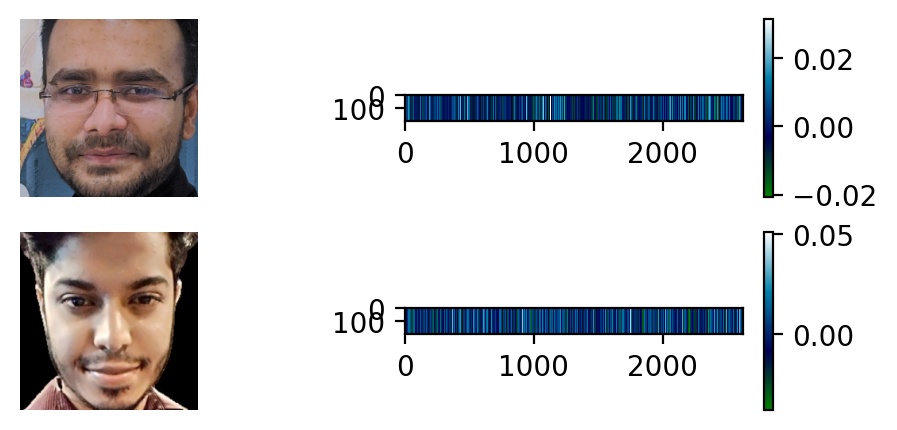

In [26]:
fig = plt.figure(dpi=200)
 
ax1 = fig.add_subplot(3,2,1)
plt.imshow(img1[0][:,:,::-1])
plt.axis('off')
 
ax2 = fig.add_subplot(3,2,2)
im = plt.imshow(img1_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
 
ax3 = fig.add_subplot(3,2,3)
plt.imshow(img2[0][:,:,::-1])
plt.axis('off')
 
ax4 = fig.add_subplot(3,2,4)
im = plt.imshow(img2_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
 
plt.show()